<a href="https://colab.research.google.com/github/bharathcn2k/Google-Colab-Projects/blob/main/turbine1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/turbine1.csv')


In [ ]:
df.describe()

,PR,nspd (speed),(efficiency)
count,48.000000,48.000000,48.000000
mean,2.416667,31.962708,72.158125
std,0.714997,9.026494,8.414508
min,1.395000,14.910000,51.170000
25%,1.802250,26.200000,67.395000
50%,2.397000,32.500000,74.765000
75%,2.997250,39.867500,79.020000
max,3.503000,44.520000,79.860000


In [ ]:
test_index = [7, 18, 25, 30, 33, 23, 13, 38, 2, 6]

In [ ]:
# df.head()
# df.columns

In [ ]:
test = df.loc[test_index]
test.head()

,PR,nspd (speed),(efficiency)
7,1.401,36.55,51.17
18,2.202,26.86,72.40
25,2.604,21.05,60.88
30,2.598,42.55,79.85
33,2.999,25.42,66.45


In [ ]:
train = df.drop(test_index, axis=0)
train.index

Int64Index([ 0,  1,  3,  4,  5,  8,  9, 10, 11, 12, 14, 15, 16, 17, 19, 20, 21,
            22, 24, 26, 27, 28, 29, 31, 32, 34, 35, 36, 37, 39, 40, 41, 42, 43,
            44, 45, 46, 47],
           dtype='int64')

In [ ]:
y_test=test['(efficiency)']
x_test= test.drop(['(efficiency)'], axis=1)

x_test.head()

,PR,nspd (speed)
7,1.401,36.55
18,2.202,26.86
25,2.604,21.05
30,2.598,42.55
33,2.999,25.42


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [ ]:
y=train['(efficiency)']
x= train.drop(['(efficiency)'], axis=1)

x.head()


,PR,nspd (speed)
0,1.405,14.91
1,1.403,19.51
3,1.397,24.99
4,1.396,26.46
5,1.405,28.10


In [ ]:
regr= linear_model.LinearRegression()

In [ ]:
regr.fit(x,y)

LinearRegression()

In [ ]:
pred = regr.predict(x_test)

In [ ]:
print(pred)

[76.51557938 69.55887486 65.43151949 64.60711112]


In [ ]:
print(y_test)

7     51.17
18    72.40
25    60.88
32    57.68
Name: (efficiency), dtype: float64


In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
print(y_test)
print(pred)

7     51.17
18    72.40
25    60.88
32    57.68
Name: (efficiency), dtype: float64
[76.51557938 69.55887486 65.43151949 64.60711112]


In [ ]:
regr.score(x,y)

0.5950632206376854

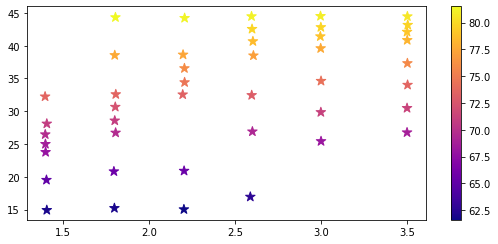

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

z = regr.predict(x)

fig, ax = plt.subplots()

s = ax.scatter(x['PR'], x['nspd (speed)'], c=z, s=100, marker='*', cmap='plasma')

fig.colorbar(s)

plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
degree=4

poly_model = PolynomialFeatures(degree=degree)
poly_x_values = poly_model.fit_transform(x)

#print(poly_x_values)
#print(f'initial values {x[1]}\nMapped to {poly_x_values[1]}')

In [ ]:
poly_model.fit(poly_x_values, y)

# we use linear regression as a base!!! ** sometimes misunderstood **
regression_model = LinearRegression()

regression_model.fit(poly_x_values, y)

y_pred = regression_model.predict(poly_x_values)

regression_model.coef_

mean_squared_error(y, y_pred, squared=False)

0.5566160959433734

In [ ]:
poly_test = poly_model.fit_transform(x_test) #Check
pred = regression_model.predict(poly_test)
print(pred)
print(y_test)

[60.70642076 72.44547106 61.03046088 79.86927683 66.90947204 75.96621318
 77.10002491 79.55082377 73.37986762 69.12619691]
7     51.17
18    72.40
25    60.88
30    79.85
33    66.45
23    76.10
13    77.13
38    79.79
2     73.17
6     65.28
Name: (efficiency), dtype: float64


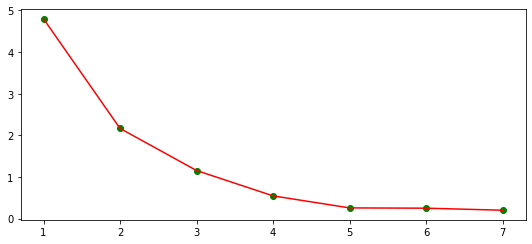

In [ ]:
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x)
   poly_model.fit(poly_x_values, y)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red")